In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
car_df = pd.read_csv(
    "https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/german_used_cars.csv",
    index_col=0,
)
car_df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [70]:
# большинство типов данных - object, надо провести спецификацию и заодно почистить
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     251079 non-null  object 
 1   model                     251079 non-null  object 
 2   color                     250913 non-null  object 
 3   registration_date         251075 non-null  object 
 4   year                      251079 non-null  object 
 5   price_in_euro             251079 non-null  object 
 6   power_kw                  250945 non-null  object 
 7   power_ps                  250950 non-null  object 
 8   transmission_type         251079 non-null  object 
 9   fuel_type                 251079 non-null  object 
 10  fuel_consumption_l_100km  224206 non-null  object 
 11  fuel_consumption_g_km     251079 non-null  object 
 12  mileage_in_km             250927 non-null  float64
 13  offer_description         251078 non-null  object

In [71]:
# убираем лишний текст, чтобы привести столбцы к вычисляемому типу
car_df["fuel_consumption_l_100km"] = car_df["fuel_consumption_l_100km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)
car_df["fuel_consumption_g_km"] = car_df["fuel_consumption_g_km"].apply(
    lambda x: str(x).split(" ")[0].replace(",", ".")
)

In [72]:
# чистим от нечисловых значений и неправильных дат
convert_to_num = [
    "price_in_euro",
    "power_kw",
    "power_ps",
    "fuel_consumption_l_100km",
    "fuel_consumption_g_km",
]
convert_to_dt = ["registration_date", "year"]

car_df[convert_to_num] = car_df[convert_to_num].apply(pd.to_numeric, errors="coerce")
car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")

# реперь датасет выглядит гораздо лучше и можно начать что-то делать с данными
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251079 entries, 0 to 251078
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   brand                     251079 non-null  object        
 1   model                     251079 non-null  object        
 2   color                     250913 non-null  object        
 3   registration_date         250882 non-null  datetime64[ns]
 4   year                      250880 non-null  datetime64[ns]
 5   price_in_euro             250880 non-null  float64       
 6   power_kw                  250786 non-null  float64       
 7   power_ps                  250869 non-null  float64       
 8   transmission_type         251079 non-null  object        
 9   fuel_type                 251079 non-null  object        
 10  fuel_consumption_l_100km  223046 non-null  float64       
 11  fuel_consumption_g_km     214274 non-null  float64       
 12  mileage

/var/folders/mk/srk2d63n62qc5h8z461_xl000000gn/T/ipykernel_4465/3275768238.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  car_df[convert_to_dt] = car_df[convert_to_dt].apply(pd.to_datetime, errors="coerce")


In [73]:
car_df.isna().mean() * 100

brand                        0.000000
model                        0.000000
color                        0.066115
registration_date            0.078461
year                         0.079258
price_in_euro                0.079258
power_kw                     0.116696
power_ps                     0.083639
transmission_type            0.000000
fuel_type                    0.000000
fuel_consumption_l_100km    11.165012
fuel_consumption_g_km       14.658733
mileage_in_km                0.060539
offer_description            0.000398
dtype: float64

In [74]:
car_df[["price_in_euro", "power_kw", "power_ps", "fuel_consumption_l_100km", "fuel_consumption_g_km", "mileage_in_km"]].describe()

,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,2.508800e+05,250786.000000,250869.000000,223046.000000,214274.000000,2.509270e+05
mean,2.613753e+04,126.477379,171.809526,7.207217,143.286384,8.534002e+04
std,3.698795e+04,75.301763,99.192201,33.315899,72.777808,7.871706e+04
min,1.200000e+02,1.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.199000e+04,82.000000,111.000000,4.900000,116.000000,2.490400e+04
50%,1.989000e+04,110.000000,150.000000,5.700000,135.000000,6.750000e+04
75%,2.995000e+04,140.000000,190.000000,6.800000,163.000000,1.265000e+05
max,5.890500e+06,2023.000000,2022.000000,2023.000000,2023.000000,3.800000e+06


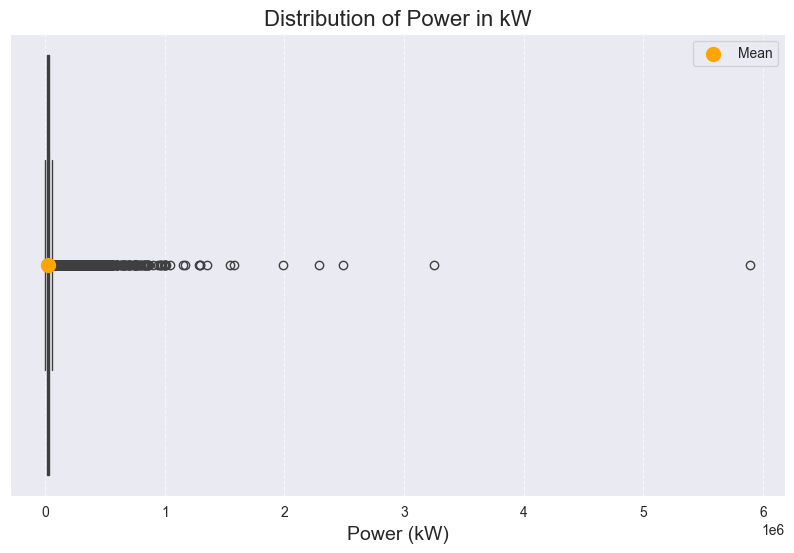

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=car_df["price_in_euro"], flierprops=dict(marker='o', color='red', markersize=6))

plt.title('Distribution of Power in kW', fontsize=16)
plt.xlabel('Power (kW)', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Overlay mean
mean_value = car_df["price_in_euro"].mean()
plt.scatter(mean_value, 0, color='orange', s=100, label='Mean', zorder=5)
plt.legend()

plt.show()

In [76]:
car_df = car_df[car_df["brand"] == "renault"]
print(car_df.groupby(["brand", "year", "offer_description", "mileage_in_km"])["price_in_euro"].max().sort_values(ascending=False))

brand    year        offer_description                            mileage_in_km
renault  2023-01-01  S MY22 Aero-P. Sicht-P. PDC Kamera           3000.0           89960.0
                     S 300 AERO-PAKET SOFORT VERFÜGBAR            1000.0           82890.0
         2018-01-01  PREMIERE EDITION bleue alpine                26000.0          81040.0
         2023-01-01  TCe140 LED EasyLink AAC PDC Alu              18.0             79999.0
                     S Microfaser-Paket                           2500.0           79990.0
                                                                                    ...   
         2001-01-01  1.6 16V Privilege                            142407.0           350.0
         2006-01-01  Clio 1.2 Campus                              232000.0           333.0
         2003-01-01  Authentique II (B/CB0)                       264347.0           289.0
         2002-01-01  1,4                                          259000.0           250.0
         2

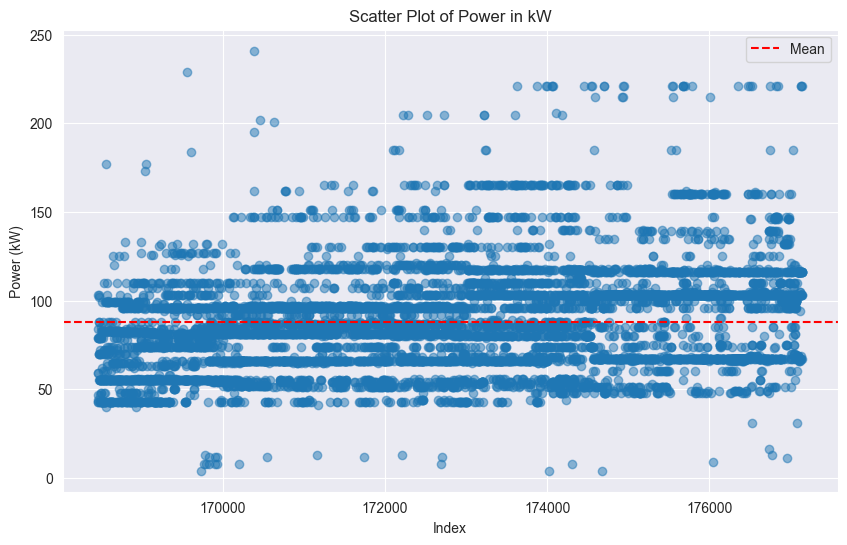

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(car_df.index, car_df["power_kw"], alpha=0.5)
plt.title('Scatter Plot of Power in kW')
plt.xlabel('Index')
plt.ylabel('Power (kW)')
plt.axhline(y=car_df["power_kw"].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()